<a href="https://colab.research.google.com/github/sidpatondikar/Capstone-Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_movies_tvshow_clustering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and Tv Shows Clustering



##### **Project Type**    - Unsupervised
##### **Author**    - Siddharth Patondikar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
netflix_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Unsupervised Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Dataset Rows & Columns count
print('The dataset has : \n')
print(f'{netflix_df.shape[0]} rows and {netflix_df.shape[1]} columns')

The dataset has : 

7787 rows and 12 columns


In [6]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
netflix_df.duplicated().value_counts()

False    7787
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Percentage of null values per column
round(netflix_df.isnull().sum()*100/len(netflix_df), 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

<Axes: >

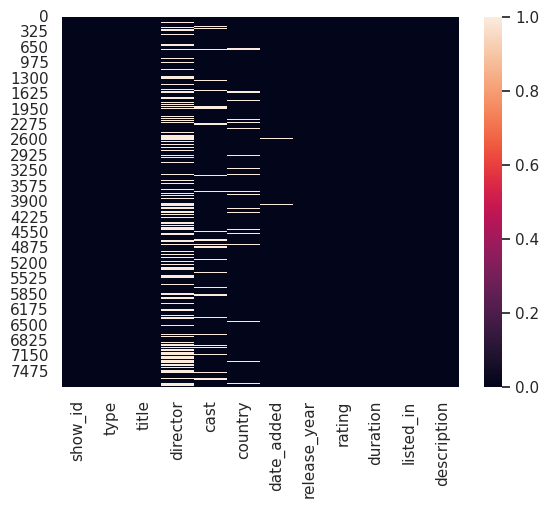

In [10]:
# Visualizing the missing values
sns.heatmap(netflix_df.isnull())

### What did you know about your dataset?

1. There are no duplicate values
2. There are null values in the following columns:
  - director
  - cast
  - country
  - date_added
  - rating

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
netflix_df.describe(include='object').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


### Variables Description

show_id : Unique ID for every Movie/Show

type : Identifier - Movie/Show

title : Title of the Movie/Show

director : Director of the Movie/Show

cast : Actors involved in the Movie/Show

country : Country where the Movie/Show was produced

date_added : Date it was added on Netflix

release_year : Actual Release year of the Movie/Show

rating : TV Rating of the Movie/Show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description : The Summary description

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print('Unique values in each column are : \n')
for col in netflix_df.columns.tolist():
  print(f'{col} : {netflix_df[col].nunique()}')

Unique values in each column are : 

show_id : 7787
type : 2
title : 7787
director : 4049
cast : 6831
country : 681
date_added : 1565
release_year : 73
rating : 14
duration : 216
listed_in : 492
description : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

In [15]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Type Of Content')

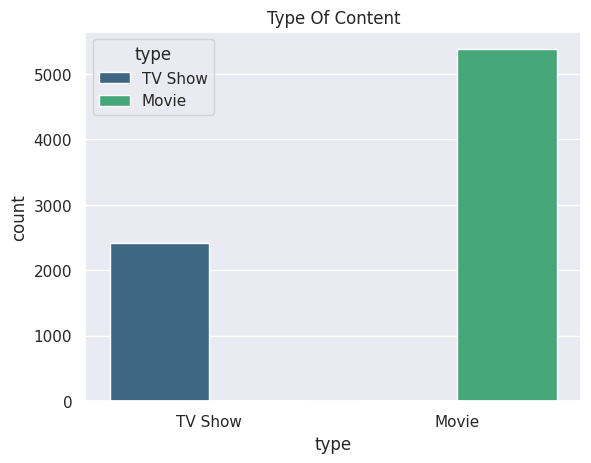

In [18]:
# Type Of Content
sns.countplot(data=netflix_df,x='type',hue='type',palette='viridis')
plt.title('Type Of Content')

##### What is/are the insight(s) found from the chart?

This graph shows the different type of content available on netflix.

In the data we have, more than 5000 movies and around 2400 TV shows.

#### Chart - 2

Text(0.5, 1.0, 'Top 10 directors with most number of Movies')

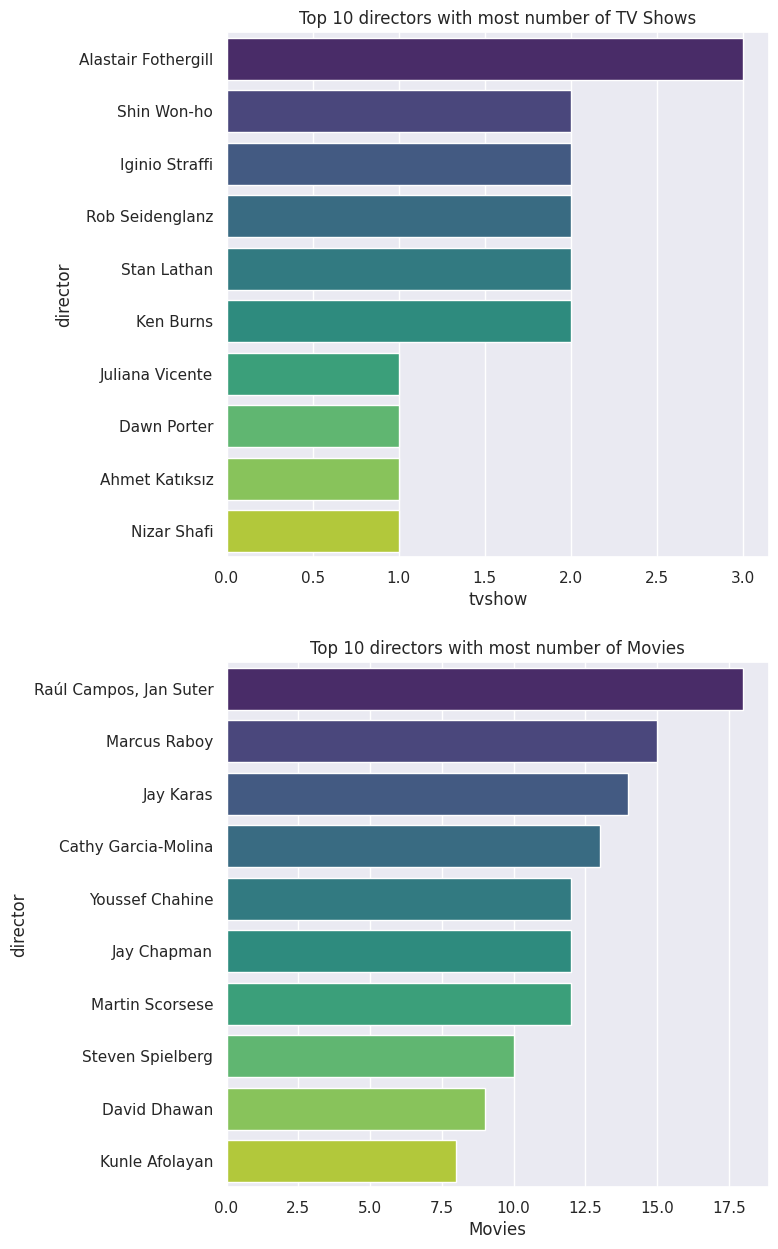

In [19]:
tv_show_dir = pd.DataFrame(netflix_df[netflix_df['type']=='TV Show']['director'].value_counts().sort_values(ascending=False)[0:10]).reset_index()
tv_show_dir.rename(columns={'index':'director','director':'tvshow'},inplace=True)

movie_dir = pd.DataFrame(netflix_df[netflix_df['type']=='Movie']['director'].value_counts().sort_values(ascending=False)[0:10]).reset_index()
movie_dir.rename(columns={'index':'director','director':'Movies'},inplace=True)

# Top 10 directors with most number of movies/tv shows
plt.figure(figsize=(7,15))

plt.subplot(2,1,1)
sns.barplot(data=tv_show_dir,y='director',x='tvshow', palette='viridis')
plt.title('Top 10 directors with most number of TV Shows')

plt.subplot(2,1,2)
sns.barplot(data=movie_dir,y='director',x='Movies', palette='viridis')
plt.title('Top 10 directors with most number of Movies')

##### What is/are the insight(s) found from the chart?

These graphs shows the top 10 directors who have directed the most number of TV Shows and movies.

Alastair Fothergill has directed most number of TV Shows on Netflix that is 3.

Raul Campos and Jan Suter has directed the most number of movies on Netflix that is 18.

#### Chart - 3

In [20]:
tv_show_actor = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack()
tv_show_actor = pd.DataFrame(tv_show_actor.value_counts().sort_values(ascending=False)[0:10]).reset_index()
tv_show_actor.rename(columns={'index':'actor',0:'tvshow'},inplace=True)


movie_actor = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ',expand=True).stack()
movie_actor = pd.DataFrame(movie_actor.value_counts().sort_values(ascending=False)[0:10]).reset_index()
movie_actor.rename(columns={'index':'actor',0:'movies'},inplace=True)

Text(0.5, 1.0, 'Top 10 actors with most number of Movies')

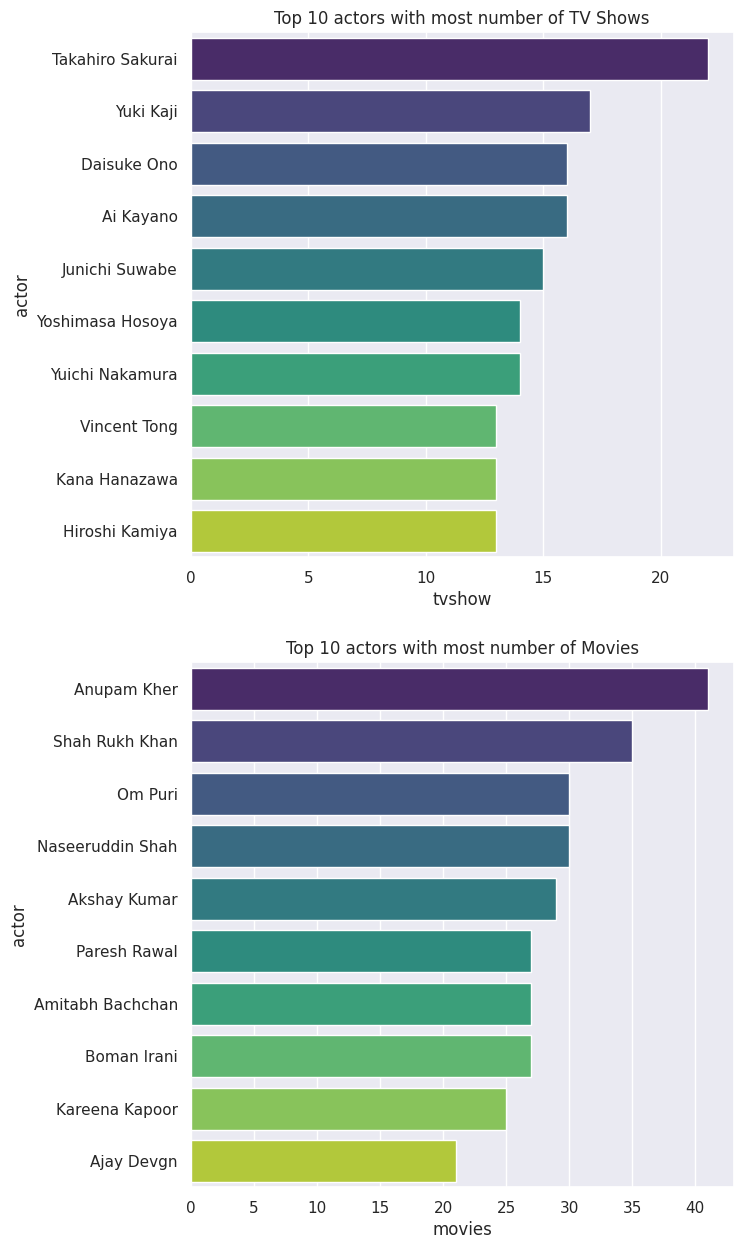

In [21]:
# Top 10 actors with most number of TV Shows/Movies on Netflix
plt.figure(figsize=(7,15))

plt.subplot(2,1,1)
sns.barplot(data=tv_show_actor,y='actor',x='tvshow', palette='viridis')
plt.title('Top 10 actors with most number of TV Shows')

plt.subplot(2,1,2)
sns.barplot(data=movie_actor,y='actor',x='movies', palette='viridis')
plt.title('Top 10 actors with most number of Movies')

##### What is/are the insight(s) found from the chart?

These graphs shows the top 10 actors who have the most number of TV Shows and movies on Netflix.

Takahiro Sakurai has acted in the most number of TV Shows on Netflix that is 22.

Anupam Kher has acted in the most number of movies on Netflix that is 41.

#### Chart - 4

In [22]:
top_countries = pd.DataFrame(netflix_df['country'].value_counts().sort_values(ascending=False)[0:10]).reset_index()
top_countries.rename(columns={'index':'country','country':'total_content'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Egypt'),
  Text(9, 0, 'Turkey')])

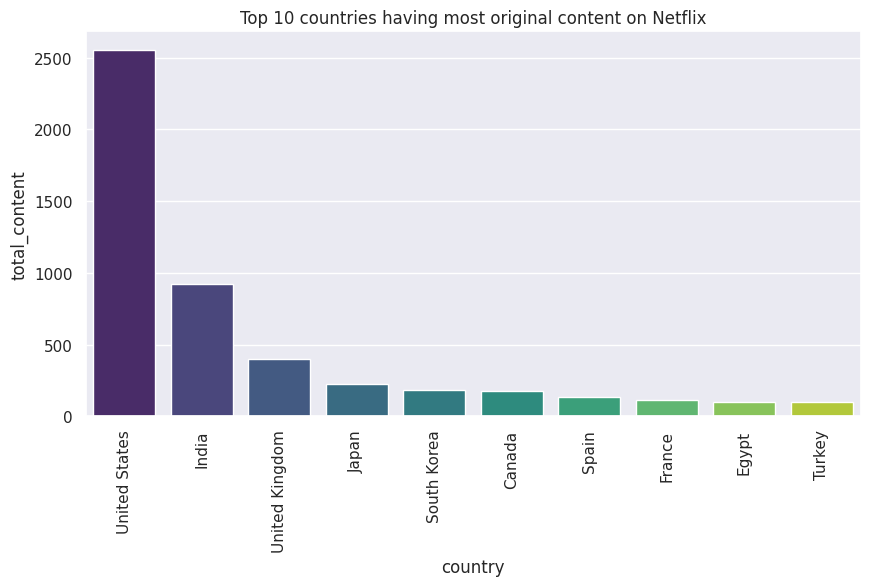

In [23]:
# Top 10 countries having most content
plt.figure(figsize=(10,5))
sns.barplot(data=top_countries,x='country', y='total_content',palette='viridis')
plt.title('Top 10 countries having most original content on Netflix')
plt.xticks(rotation=90)

##### 2. What is/are the insight(s) found from the chart?

This graph shows countries which have the most original content on Netflix

United States tops the list with more than 2500 movies and TV shows

#### Chart - 5

Text(0.5, 1.0, 'Top 10 year with most content released')

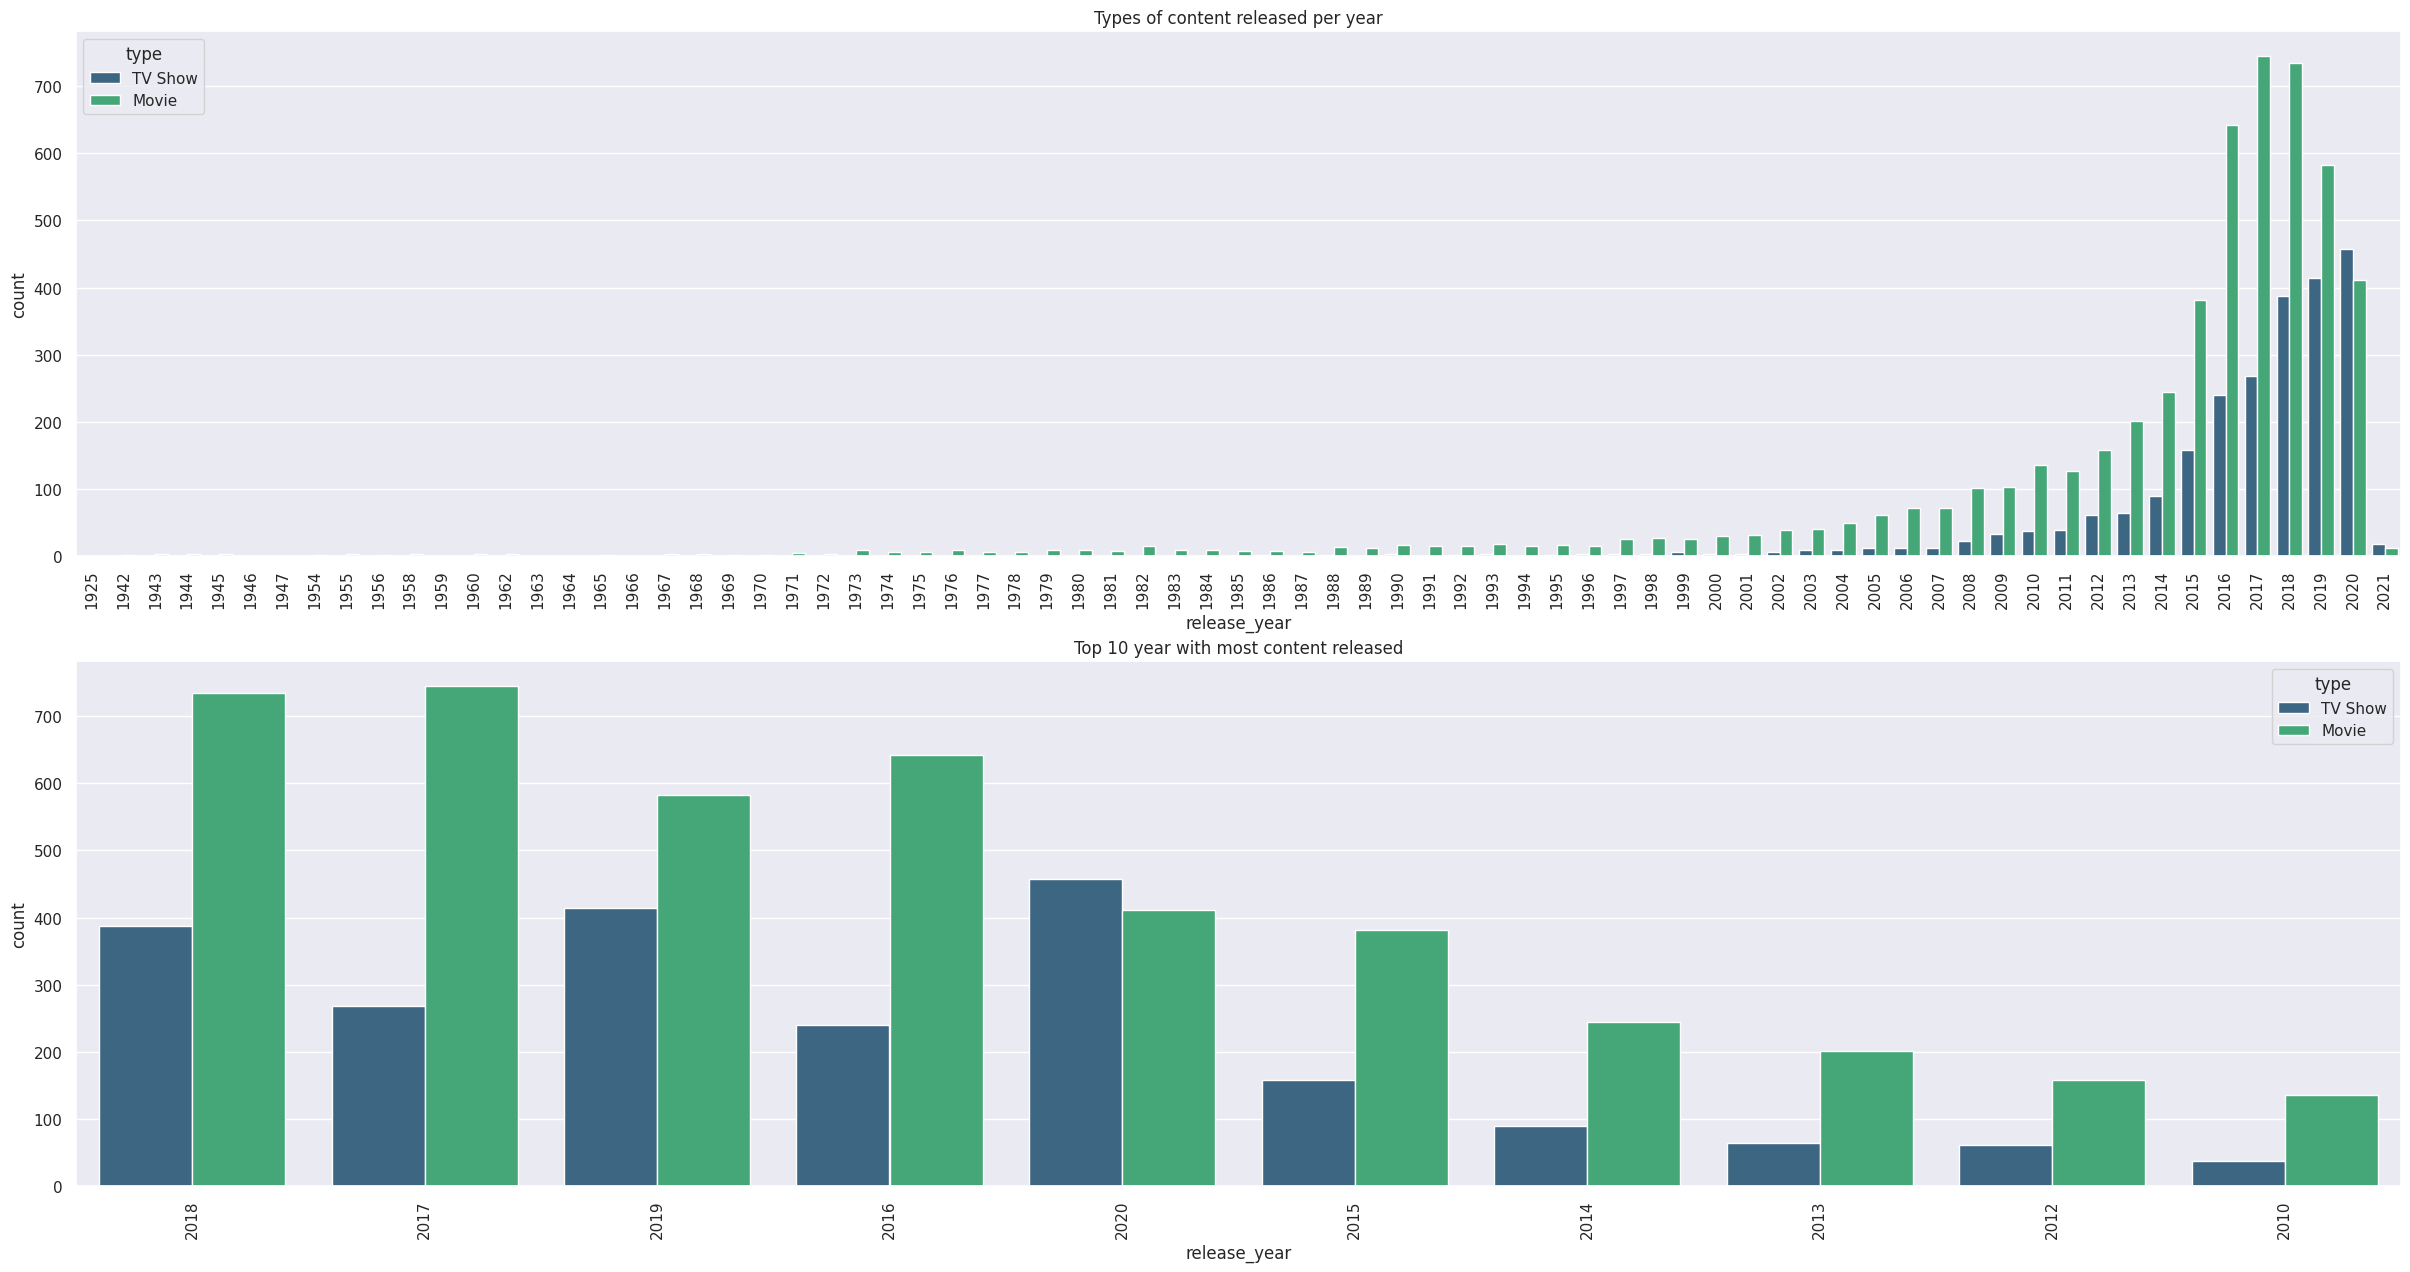

In [24]:
#Distribution of type of content every year
plt.figure(figsize=(30,15))

plt.subplot(2,1,1)
sns.countplot(data=netflix_df, x='release_year',hue='type',palette='viridis')
plt.xticks(rotation=90)
plt.title('Types of content released per year')

plt.subplot(2,1,2)
sns.countplot(data=netflix_df, x='release_year',hue='type',order=netflix_df['release_year'].value_counts().index[0:10], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 year with most content released')

##### 2. What is/are the insight(s) found from the chart?

The two graph shows:
1. Types of content released every year
  - From this we can see that, mostly netflix has content that is released in the 2000s
2. Top 10 years with the most number of total releases
  - From this we can see that highest total content (TV shows + movies) was released in 2018, followed by 2017 and 2019
  - Most number of movies were released in 2017
  - Most number of TV shows were released in 2020

In [25]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


#### Chart - 6

Text(0.5, 1.0, 'Distribution of ratings')

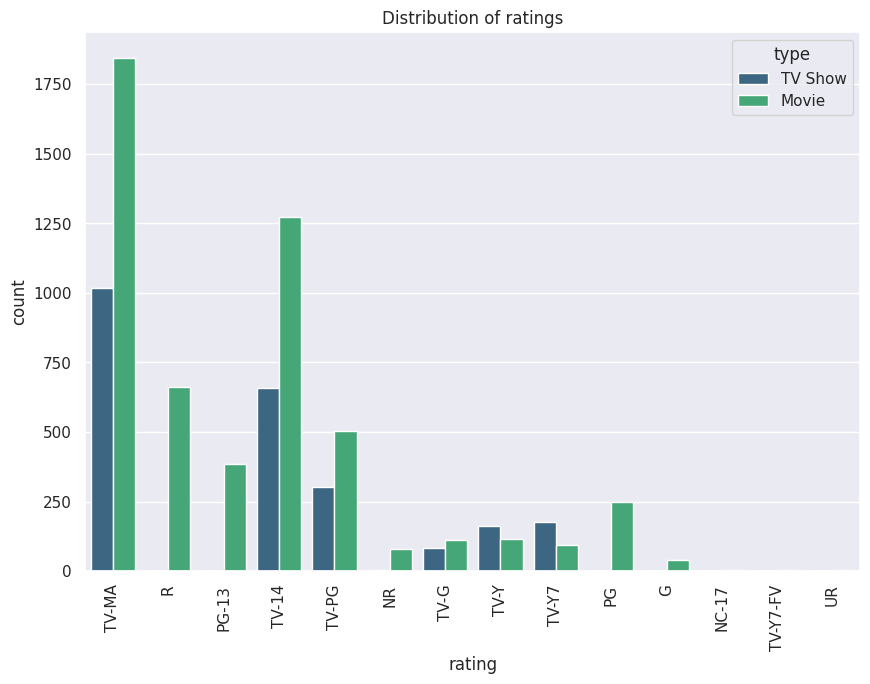

In [26]:
# Distibution of rating
plt.figure(figsize=(10,7))
sns.countplot(data=netflix_df,x='rating',hue='type',palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of ratings')

##### What is/are the insight(s) found from the chart?

Genral Description :
  - TV - MA : Mature Audiences Only
  - R - Restricted (18+)
  - PG - 13 : Parents Strongly Cautioned (13+)
  - TV - 14 : For Children 14+ with company of parents
  - TV - PG : Intented for children in the presence of parents
  - NR : Not Rated
  - TV - G : Tv for general audience (everyone included)
  - TV - Y : For children between age 2 and 6
  - PG : Parental guidance suggested
  - G : General (All audience)
  - NC - 17 : Clearly Adult
  - TV - Y7 - FV : Directed to older children (Fantasy Violence)
  - UR : Unrated


- Most number of movies and TV shows are TV-MA rated followed by TV-14, this means most movies and TV shows on netflix are for mature audiences only, this is followed by movies and shows for age 14+.

- There are no shows and only movies R rated category (Restriced : 18+) and PG-13 (13+) category.

- From these stats, it is cleary visible that majority of audience of Netflix is above 18, as most of the shows and movies are catering to that audience.

- Very few to no movies or shows are without ratings.


#### Chart - 7

Text(0.5, 1.0, 'Distibution of ratings in top 10 countries')

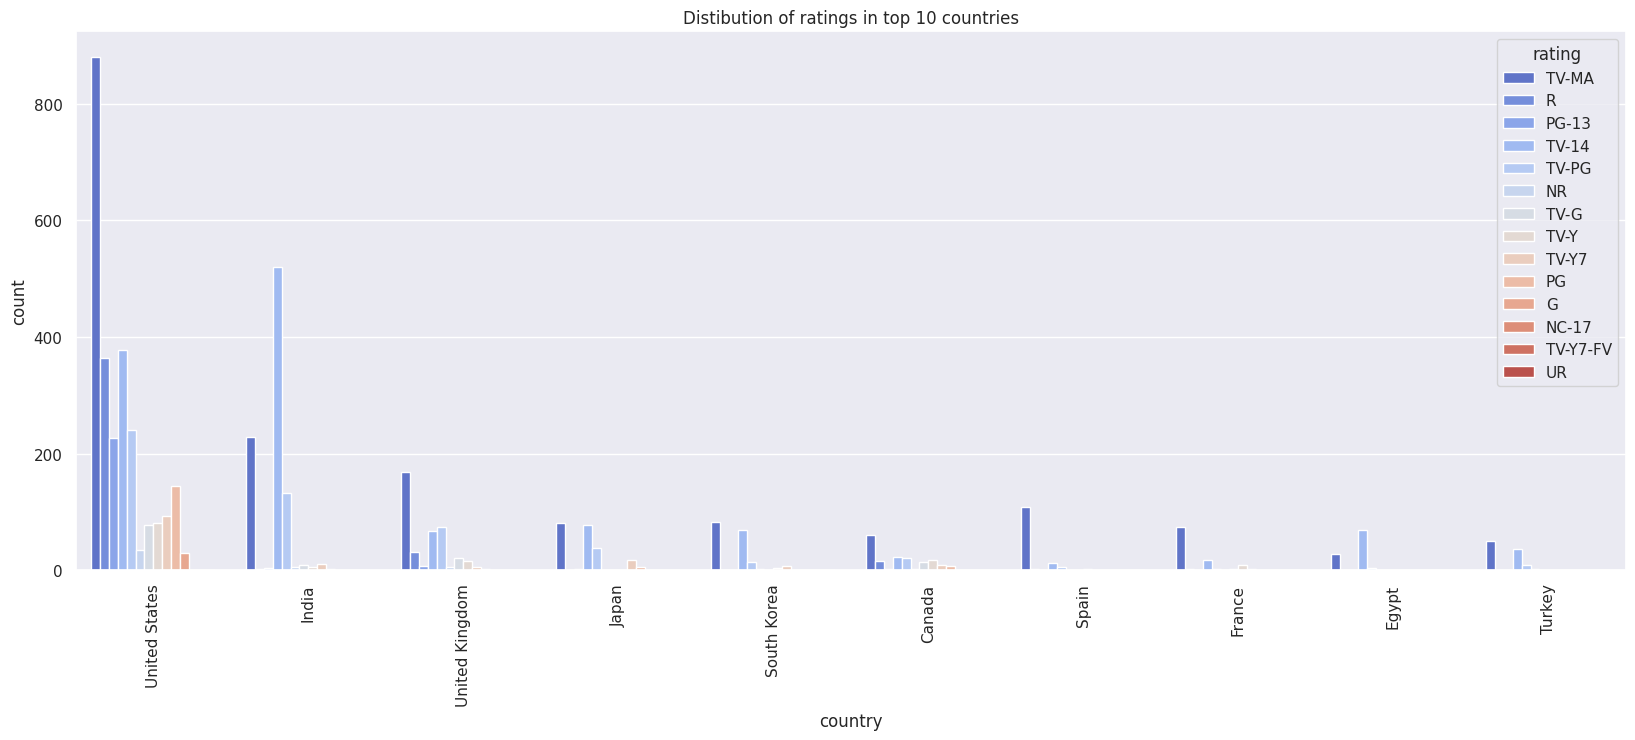

In [27]:
# Distribution of ratings in top 10 country
plt.figure(figsize=(20,7))
sns.countplot(data=netflix_df,x='country',hue='rating', order=netflix_df['country'].value_counts().index[0:10], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distibution of ratings in top 10 countries')

##### What is/are the insight(s) found from the chart?

- Most of the cortent originating from top 10 countries on netflix is for mature audiences. The most being in United States with more than 800 movies and shows.
- The exception to above is India and Egypt, where the most content is for 14+ audiences.


#### Chart - 8

In [28]:
# Creating list for length of movies and shows
movie_length = netflix_df[netflix_df['type']=='Movie']['duration'].apply(lambda x: int(x.split(' ')[0]) )

tv_show_length = netflix_df[netflix_df['type']=='TV Show']['duration'].apply(lambda x: int(x.split(' ')[0]) )

Text(0.5, 0, 'Seasons')

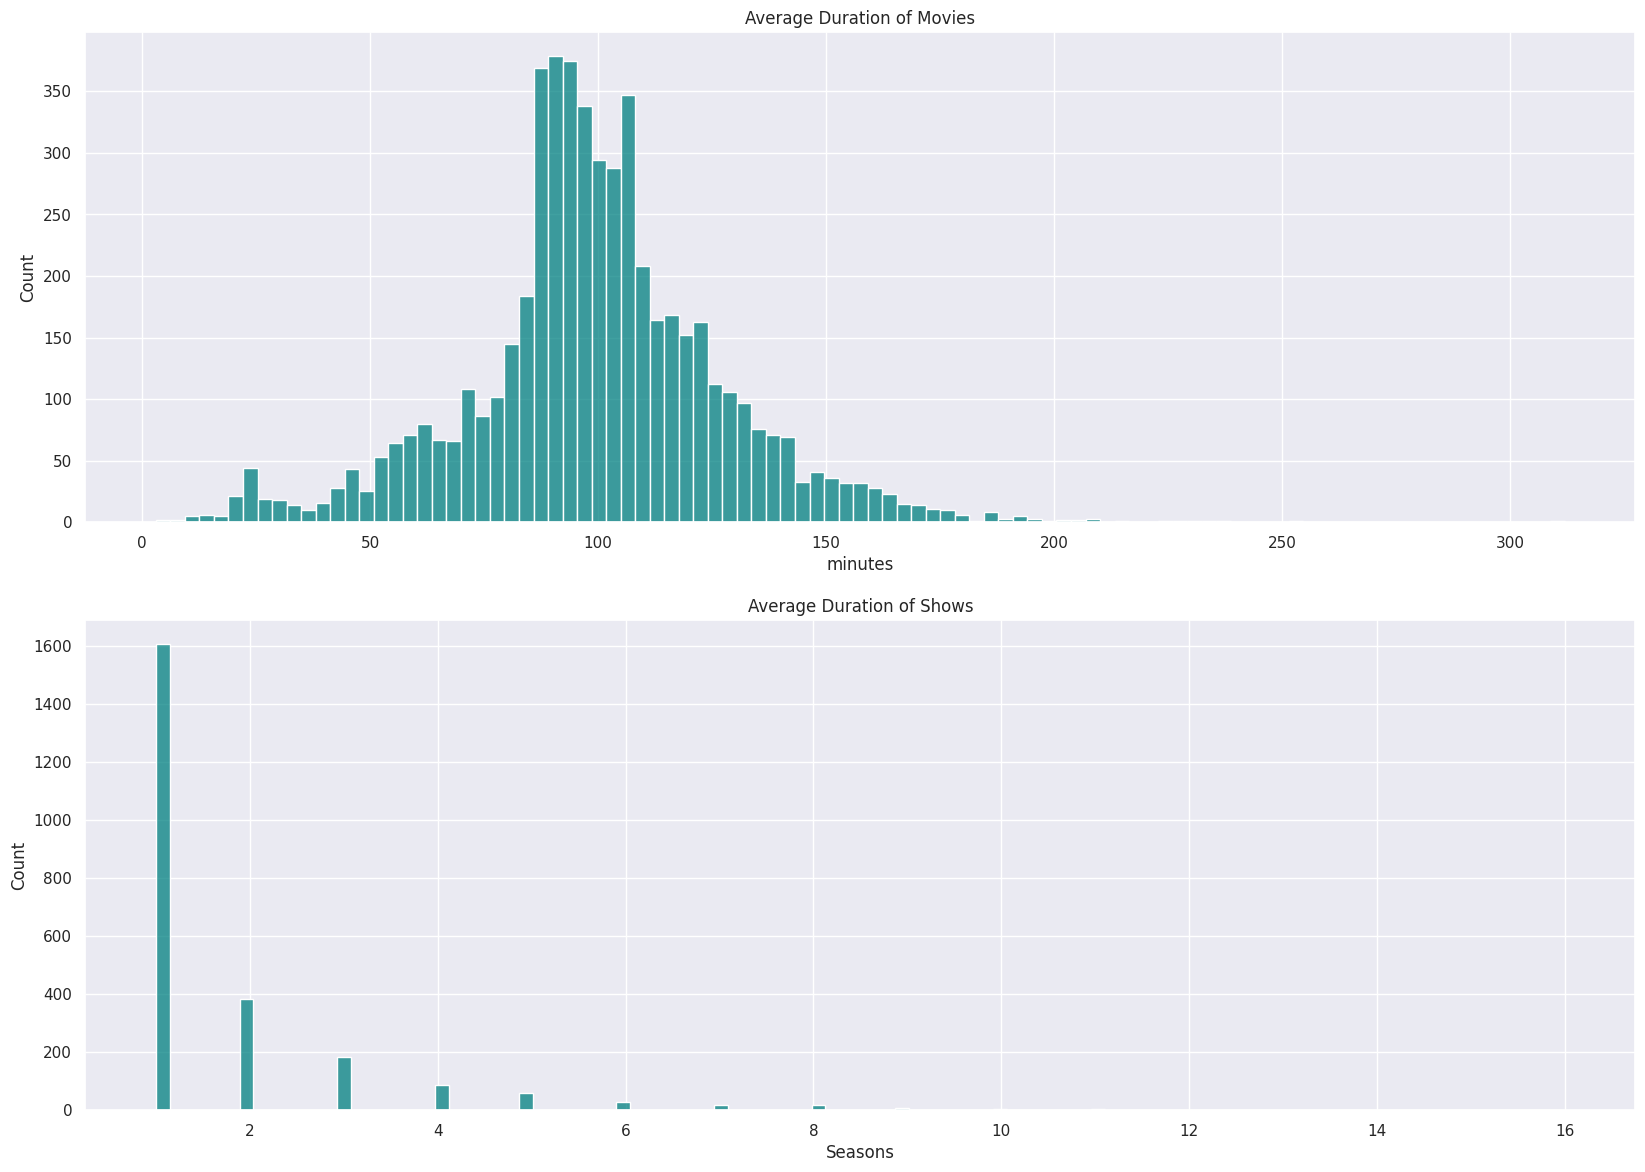

In [29]:
# Length of movies and shows
plt.figure(figsize=(20,14))

plt.subplot(2,1,1)
sns.histplot(list(movie_length),color='teal')
plt.title('Average Duration of Movies')
plt.xlabel('minutes')

plt.subplot(2,1,2)
sns.histplot(list(tv_show_length),color='teal')
plt.title('Average Duration of Shows')
plt.xlabel('Seasons')

##### What is/are the insight(s) found from the chart?

- Most of the movies run for duration of around 100 minutes
- Most of the show run for 1 seasons

#### Chart - 9

In [30]:
#Creating new dataframe for genres
genres = netflix_df['listed_in'].str.split(',',expand=True).stack()
genres = genres.value_counts().reset_index().rename(columns={'index':'genre',0:'total_content'})
genres

,genre,total_content
0,International Movies,2323
1,Dramas,1384
2,Comedies,1074
3,Documentaries,751
4,Dramas,722
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,Sports Movies,1
71,TV Sci-Fi & Fantasy,1


Text(0.5, 1.0, 'Bottom 10 genres')

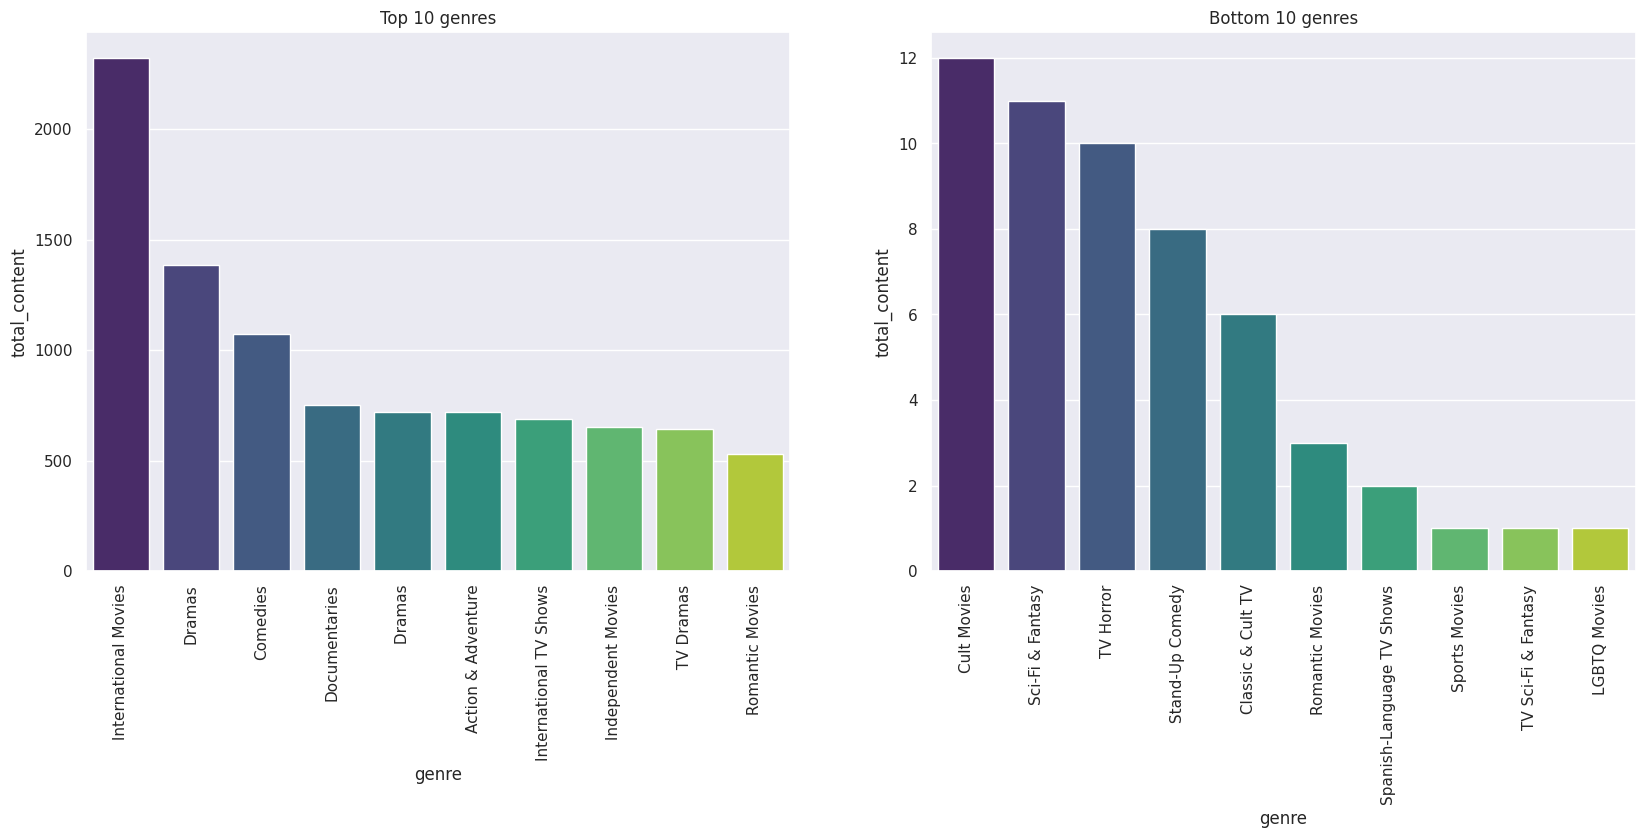

In [31]:
# Top and bottom genres on Netflix
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.barplot(data=genres.head(10),x='genre',y='total_content',palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 genres')

plt.subplot(1,2,2)
sns.barplot(data=genres.tail(10),x='genre',y='total_content', palette='viridis')
plt.xticks(rotation=90)
plt.title('Bottom 10 genres')


##### What is/are the insight(s) found from the chart?

- Top genre on Netflix in International Movies, this basically refers to non-english movies. This is followed by genres Dramas and Comedies.
  - From this we can see that there is huge demand for foreign (non-english) content on Netflix.

- The bottome genre on Neflix is LGBTQ Movies, this is followed by genres such as Sci-Fi Fantasy shows and Sport Movies.

#### Chart - 10

In [32]:
#Creating list of words in description of movies and tv shows for making wordcloud
movies_text = ' '.join(word for word in netflix_df[netflix_df['type']=='Movie']['description'])
tv_show_text = ' '.join(word for word in netflix_df[netflix_df['type']=='TV Show']['description'])

Text(0.5, 1.0, 'Themes in TV Shows')

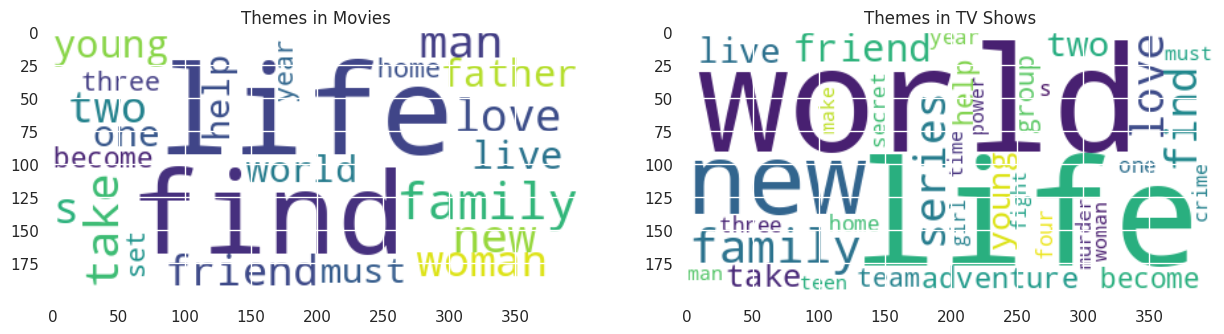

In [33]:
# Themes of Movies and TV Shows

#Creating Word Clouds for Movies and TV Shows
wordcloud_movie = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(movies_text)
wordcloud_show = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(tv_show_text)

plt.figure(figsize=(15,7))

# Themes of Movies and TV Shows
plt.subplot(1,2,1)
plt.imshow(wordcloud_movie, interpolation='bilinear')
plt.title('Themes in Movies')

plt.subplot(1,2,2)
plt.imshow(wordcloud_show, interpolation='bilinear')
plt.title('Themes in TV Shows')

##### What is/are the insight(s) found from the chart?

- The most used words from description of movies are 'Life','family','find','love'. This means the running theme in most of the movies are about life, love and family.

- The most used words from description of shows are 'world','life','new','family','love'. This means the running theme is most shows is very similar to that in most movies.

#### Chart - 11

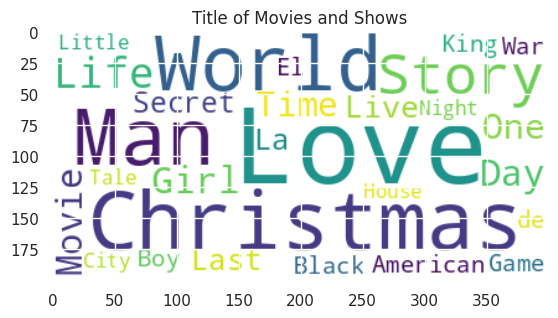

In [34]:
# Title Wordcloud

#Creating a wordcloud for title of shows and movies
title = ' '.join(word for word in netflix_df['title'].tolist())
wordcloud_title = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(title)

#Title Wordcloud
plt.imshow(wordcloud_title,interpolation='bilinear')
plt.title('Title of Movies and Shows')
plt.show()

##### What is/are the insight(s) found from the chart?

- Words like 'Love','Christmas','Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

#### Chart 12

<BarContainer object of 11 artists>

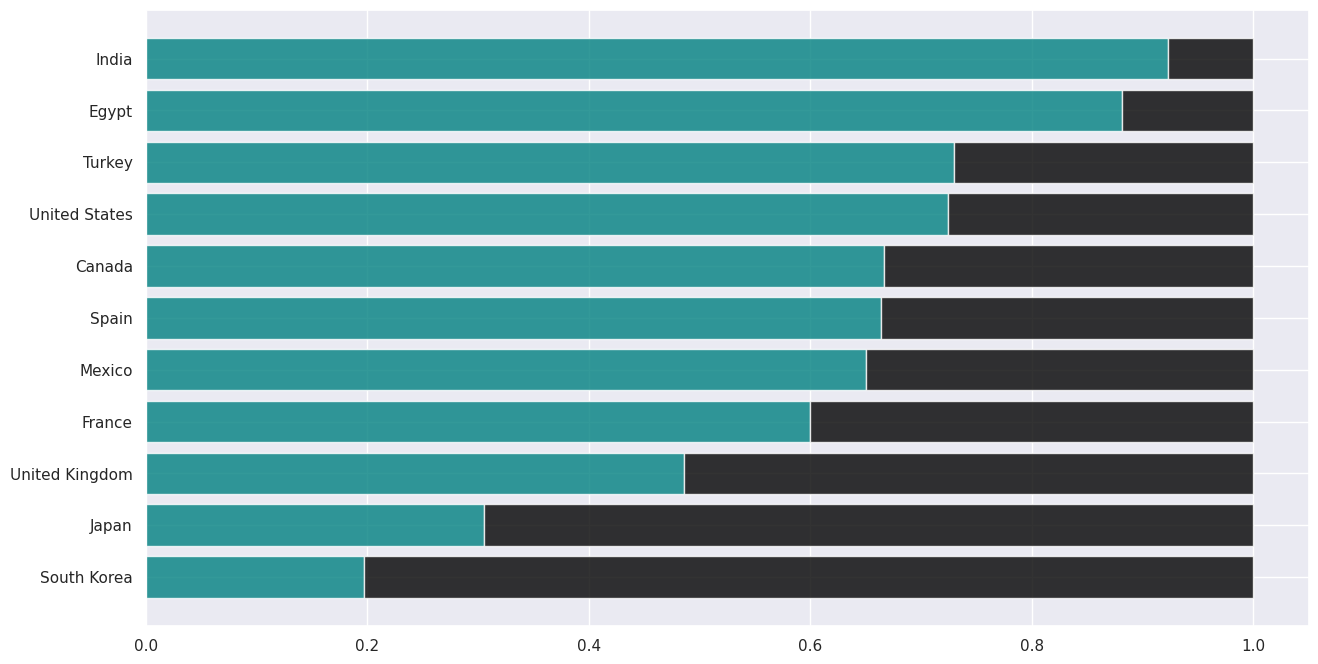

In [35]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = netflix_df['country'].value_counts()[:11].index
content_data = netflix_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='teal', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

##### What is/are the insight(s) found from the chart?

- India has highest ratio of movies to shows on Netflix, whereas SouthKorea has highest ratio of shows to movies on Netflix.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

##### What is/are the insight(s) found from the chart?

- Words like 'Love','Christmas','Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

From Here, we will make the following changes to handle null values:
1. Drop the director column
2. Add '' to cast and country columns
3. Drop NA values from date_added and rating columns

In [40]:
# Handling Missing Values & Missing Value Imputation
netflix_df.drop('director',axis=1, inplace=True)

netflix_df['cast'].fillna('')
netflix_df['country'].fillna('')

netflix_df.dropna(inplace=True)

In [41]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 2. Handling Outliers

Text(0.5, 1.0, 'Distribution of release year')

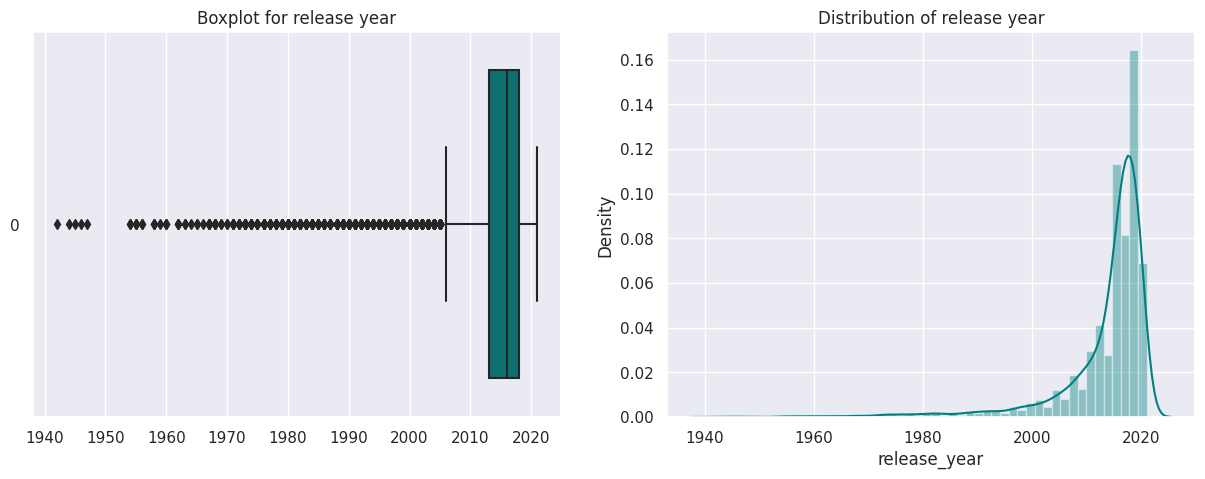

In [42]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(netflix_df['release_year'], orient='h', color='teal')
plt.title('Boxplot for release year')

plt.subplot(1,2,2)
sns.distplot(netflix_df['release_year'], color='teal')
plt.title('Distribution of release year')

Only release_year is our numeric columns, rest all are text based columns. As in our clustering model, we will only feature text based columns, therefore removing outliers on this column is not required as it is not useful for us.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [47]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 6.1. Attribute Selection

In [76]:
# Creating a new feature combining all text based features
netflix_df['text_data'] = netflix_df['cast'] + netflix_df['country'] + netflix_df['rating'] + netflix_df['listed_in'] + netflix_df['description']
netflix_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,text_data
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


In [46]:
#Selecting Random text data
netflix_df['text_data'][3]

'Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom KaneUnited StatesPG-13Action & Adventure, Independent Movies, Sci-Fi & FantasyIn a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.'

#### 6.2. Remove Punctuation +  Lower Casing

In [70]:
# Punctuation
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [71]:
#Creating a function to remove punctuation and lower case
def remove_punc(text):
  non_punc = [word.lower() for word in text if word.lower() not in string.punctuation]
  return ''.join(non_punc)

In [77]:
#Applying to dataframe
netflix_df['text_data'] = netflix_df['text_data'].apply(remove_punc)

In [78]:
netflix_df['text_data'][3]

'elijah wood john c reilly jennifer connelly christopher plummer crispin glover martin landau fred tatasciore alan oppenheimer tom kaneunited statespg13action  adventure independent movies scifi  fantasyin a postapocalyptic world ragdoll robots hide in fear from dangerous machines out to exterminate them until a brave newcomer joins the group'

#### 6.3. Removing Stopwords

In [59]:
# Remove Stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
#Defining function to remove stopwords
def remove_stop(msg):
  data = [word for word in msg.split(' ') if word not in stopwords.words('english')]
  return ' '.join(data)

In [80]:
#Applying to dataframe
netflix_df['text_data'] = netflix_df['text_data'].apply(remove_stop)
netflix_df['text_data'][3]

'elijah wood john c reilly jennifer connelly christopher plummer crispin glover martin landau fred tatasciore alan oppenheimer tom kaneunited statespg13action  adventure independent movies scifi  fantasyin postapocalyptic world ragdoll robots hide fear dangerous machines exterminate brave newcomer joins group'

#### 6.4 Stemming

In [83]:
stemmer = SnowballStemmer('english')

#Defining a function to perform stemming
def stem(msg):
  stem = [stemmer.stem(word) for word in msg.split(' ')]
  return ' '.join(stem)

In [84]:
#Applying to dataframe
netflix_df['text_data'] = netflix_df['text_data'].apply(stem)
netflix_df['text_data'][3]

'elijah wood john c reilli jennif connelli christoph plummer crispin glover martin landau fred tatascior alan oppenheim tom kaneunit statespg13act  adventur independ movi scifi  fantasyin postapocalypt world ragdol robot hide fear danger machin extermin brave newcom join group'

#### 6.5 Text Vectorization

In [99]:
# Appying TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=False, max_features=5000)
X = vectorizer.fit_transform(netflix_df['text_data'])

In [100]:
X.toarray()[3]

array([0., 0., 0., ..., 0., 0., 0.])

In [101]:
print(vectorizer.get_feature_names_out())

['10' '10yearold' '11yearold' ... 'álvaro' 'ángel' 'ángela']


In [102]:
len(vectorizer.get_feature_names_out())

5000

In [103]:
X.toarray().shape

(6643, 5000)

In [105]:
X = X.toarray()

##### Which text vectorization technique have you used and why?

Answer Here.

### 6.6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [106]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

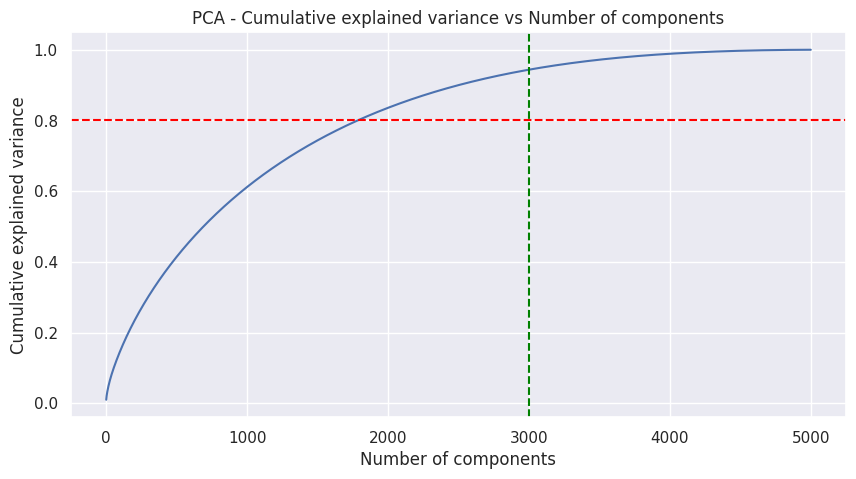

In [107]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

In [108]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(X)

# transformed features
X = pca.transform(X)

# shape of transformed vectors
X.shape

(6643, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***